In [1]:
import os
os.chdir(r"C:\Users\dell\Desktop\Github\ML")
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('Data1.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)

In [7]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[191   0   0]
 [ 19   0  13]
 [  8   2 109]]


In [8]:
accuracy_score(y_test, y_pred)

0.8771929824561403

In [9]:
#'''*******************Precision_score, Recall_score **********************'''
from sklearn.metrics import precision_score, recall_score
precision_score(y_test,y_pred,average='macro')

0.5898631373138817

In [10]:
recall_score(y_test,y_pred,average='macro')

0.6386554621848739

In [11]:
#'''**********************classification_report*****************************'''
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           2       0.88      1.00      0.93       191
           3       0.00      0.00      0.00        32
           4       0.89      0.92      0.90       119

    accuracy                           0.88       342
   macro avg       0.59      0.64      0.61       342
weighted avg       0.80      0.88      0.84       342



In [12]:
#'''*****************************K-fold***********************************'''

from sklearn.model_selection import cross_val_score
cross_val_score(classifier,X,y,cv=4)

array([0.59356725, 0.59064327, 0.59237537, 0.59237537])

In [13]:
# Just to check the mean  value of the scores of k-fold as same as above code
cross_val_score(classifier,X,y,cv=4).mean()

0.5922403148634048

# '''**************************# K-Nearest Neighbors (K-NN)**********************'''

In [14]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[190   0   1]
 [ 20   0  12]
 [  8   0 111]]


In [17]:
accuracy_score(y_test, y_pred)

0.8801169590643275

In [18]:
#'''*************Precision_score, Recall_score ***************'''
from sklearn.metrics import precision_score, recall_score
precision_score(y_test,y_pred,average='macro')

0.5889069744500345

In [19]:
recall_score(y_test,y_pred,average='macro')

0.6425125023831523

In [20]:
#'''***********classification_report*************************'''
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.87      0.99      0.93       191
           3       0.00      0.00      0.00        32
           4       0.90      0.93      0.91       119

    accuracy                           0.88       342
   macro avg       0.59      0.64      0.61       342
weighted avg       0.80      0.88      0.84       342



In [21]:
#k-fold score
from sklearn.model_selection import cross_val_score
cross_val_score(classifier,X,y,cv=4) 

array([0.66959064, 0.56725146, 0.56891496, 0.63343109])

In [22]:
cross_val_score(classifier, X,y,cv=4).mean()

0.6097970365797191

In [23]:
#'''********#Hyper Parameter Tunning**********'''
kfoldscores = []
for k in range(1,21,2):
    classifier=KNeighborsClassifier(n_neighbors=k)
    kfoldscores.append(cross_val_score(classifier, X,y,cv=4).mean())

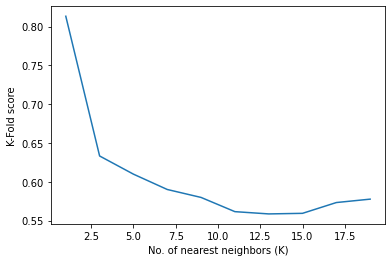

In [24]:
#visualising the k-fold scores for different values of k
import matplotlib.pyplot as plt
plt.plot(range(1,21,2),kfoldscores)
plt.xlabel('No. of nearest neighbors (K)')
plt.ylabel('K-Fold score')
plt.show()

In [25]:
#'''******** GridSearch**********'''
from sklearn.model_selection import GridSearchCV
modelKN = KNeighborsClassifier()
grid_paramsKN = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11], 
                 'weights' : ['uniform','distance']}
clfKN = GridSearchCV(modelKN, grid_paramsKN, scoring='accuracy', cv=4)
clfKN.fit(X,y)

GridSearchCV(cv=4, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [26]:
clfKN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [27]:
clfKN.best_params_ 

{'n_neighbors': 1, 'weights': 'uniform'}

In [28]:
#Best Score
clfKN.best_score_ 

0.813317813105589

# '''************************# Random Forest Classification**********************'''

In [29]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[177  14   0]
 [ 21   0  11]
 [  3   5 111]]


In [32]:
accuracy_score(y_test, y_pred)

0.8421052631578947

In [33]:
#'''*************Precision_score, Recall_score ***************'''
from sklearn.metrics import precision_score, recall_score
precision_score(y_test,y_pred,average='macro')

0.5968110268330479

In [34]:
recall_score(y_test,y_pred,average='macro')

0.6198248933081086

In [35]:
#'''***********classification_report*************************'''
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           2       0.88      0.93      0.90       191
           3       0.00      0.00      0.00        32
           4       0.91      0.93      0.92       119

    accuracy                           0.84       342
   macro avg       0.60      0.62      0.61       342
weighted avg       0.81      0.84      0.82       342



In [36]:
#k-fold score
from sklearn.model_selection import cross_val_score
cross_val_score(classifier,X,y,cv=4) 

array([0.89473684, 0.74853801, 0.74193548, 0.88856305])

In [37]:
cross_val_score(classifier, X,y,cv=4).mean()

0.8184433468813774

<function matplotlib.pyplot.show(close=None, block=None)>

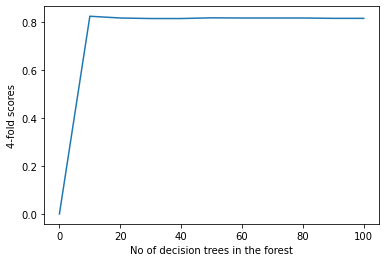

In [38]:
#'''********#Hyper Parameter Tunning**********'''
kfold_scores = []
kfold_scores.append(0)
for n in range(10,101,10):
    rf = RandomForestClassifier(n_estimators=n,random_state=0)
    kfold_scores.append(cross_val_score(rf,X,y,cv=4).mean()) 
    
import matplotlib.pyplot as plt
plt.plot(range(0,101,10),kfold_scores)
plt.xlabel('No of decision trees in the forest')
plt.ylabel('4-fold scores')
plt.show

In [39]:
#'''******** GridSearch**********'''
from sklearn.model_selection import GridSearchCV
rndclCV = RandomForestClassifier(random_state=0)

grid_params={'n_estimators': [10,20,30,40,50],
             'max_depth':[5,10,15]}

ran = GridSearchCV(rndclCV, grid_params, scoring='accuracy', cv=4)
ran.fit(X_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [40]:
ran.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [41]:
ran.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [42]:
ran.best_score_

0.884765625

# '''************************# SVM**********************'''



In [43]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)

In [45]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[191   0   0]
 [ 19   0  13]
 [  7   1 111]]


In [46]:
accuracy_score(y_test, y_pred)

0.8830409356725146

In [47]:
#'''*************Precision_score, Recall_score ***************'''
from sklearn.metrics import precision_score, recall_score
precision_score(y_test,y_pred,average='macro')
recall_score(y_test,y_pred,average='macro')

0.6442577030812325

In [48]:
#'''***********classification_report*************************'''
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           2       0.88      1.00      0.94       191
           3       0.00      0.00      0.00        32
           4       0.90      0.93      0.91       119

    accuracy                           0.88       342
   macro avg       0.59      0.64      0.62       342
weighted avg       0.80      0.88      0.84       342



In [49]:
#k-fold score 
#from sklearn.model_selection import cross_val_score
#cross_val_score(classifier,X,y,cv=4)
#cross_val_score(classifier, X,y,cv=4).mean()

In [50]:
# Using SGDClassifier with 'hinge' loss function
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(loss='hinge')
model.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [51]:
# Checking the test score
model.score(X_train,y_train)

0.8603515625

In [52]:
# Checking TEST score
model.score(X_test,y_test)

0.847953216374269

In [53]:
#'''******** # Hyper-parameter tuning**********'''
params = {
           'learning_rate':['constant', 'invscaling'],
           'eta0':[1,0.1,0.01,0.001],
           'power_t':[0.5,1,2],
           'penalty':['l2', 'l1'],
           'alpha':[0.1,0.01,0.001]
         }

In [54]:
#'''******** GridSearch**********'''
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SGDClassifier(loss='hinge'),params,cv=4)
clf.fit(X_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.01, 0.001],
                         'eta0': [1, 0.1, 0.01, 0.001],
                         'learning_rate': ['constant', 'invscaling'],
                         'pen

In [55]:
# To check the best params for training set
clf.best_params_

{'alpha': 0.1,
 'eta0': 0.01,
 'learning_rate': 'invscaling',
 'penalty': 'l2',
 'power_t': 0.5}

In [56]:
clf.best_score_

0.884765625

In [57]:
# To check the test score
clf.score(X_test,y_test)

0.8859649122807017

# <center> Thank You....